In [1]:
import pandas as pd
df = pd.read_csv("c:/data/guerry/data.csv")
df.head()

,Unnamed: 0,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,1,E,Ain,28870,15890,37,5098,33120,35039,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,2,N,Aisne,26226,5521,51,8901,14572,12831,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,3,C,Allier,26747,7925,13,10973,17044,114121,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,...,22,23,64,79,35,7,1,320.280,5549,129.10


<AxesSubplot:>

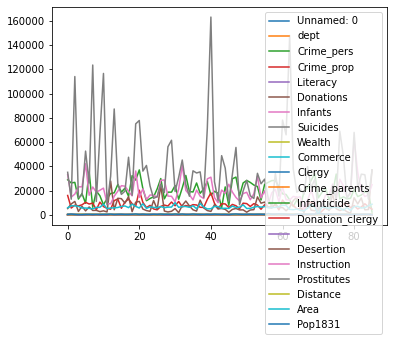

In [2]:
%matplotlib inline
df.plot()

In [3]:
# 결측값 제거하고 df에 다시 저장

df.dropna(inplace=True)
df.shape # 샘플수 85개, 필드 24개

(85, 24)

In [4]:
df2 = df[['Crime_prop', 'Literacy', 'Wealth', 'Distance']]

import statsmodels.formula.api as smf

# 범죄율Crime_prop이 종속 변수
# 문해율Literacy, 재산세 순위Wealth, 수도까지의 거리Distance가 독립 변수
# 독립 변수들은 + 해주면 됨
model = smf.ols(formula='Crime_prop ~ Literacy + Wealth + Distance', data=df2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Crime_prop   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     10.33
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           7.89e-06
Time:                        17:14:34   Log-Likelihood:                -788.25
No. Observations:                  85   AIC:                             1584.
Df Residuals:                      81   BIC:                             1594.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7118.5554   1162.059      6.126      0.000    4806.423    9430.688
Literacy     -41.6264     17.664     -2.357      0.021     -76.773      -6.480
Wealth        43.4753     12.868      3.378      0.001      17.871      69.080
Distance       2.4385      3.158      0.772      0.442      -3.845       8.722
==============================================================================
Omnibus:                       26.539   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.437
Skew:                           1.238   Prob(JB):                     1.36e-10
Kurtosis:                       5.587   Cond. No.                         954.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Literacy', ylabel='Crime_prop'>

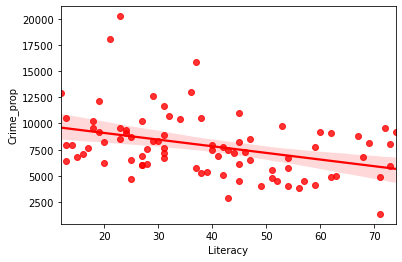

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot('Literacy', 'Crime_prop', df, color='red')

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Wealth', ylabel='Crime_prop'>

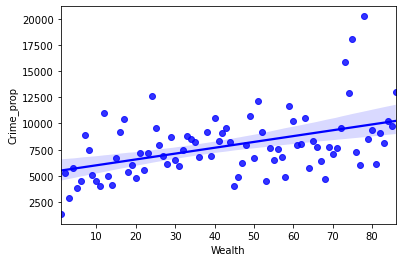

In [6]:
sns.regplot('Wealth', 'Crime_prop', df, color='blue')

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Distance', ylabel='Crime_prop'>

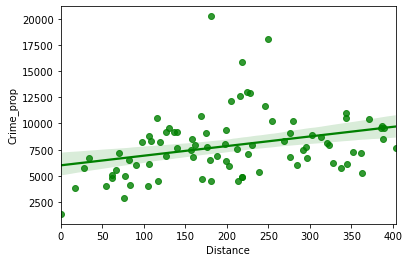

In [7]:
sns.regplot('Distance', 'Crime_prop', df, color='green')

<AxesSubplot:xlabel='Distance', ylabel='Crime_prop'>

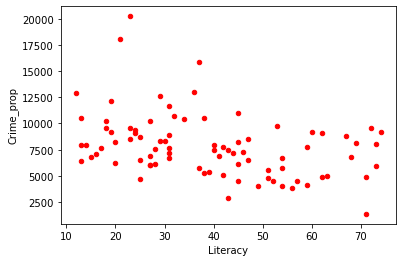

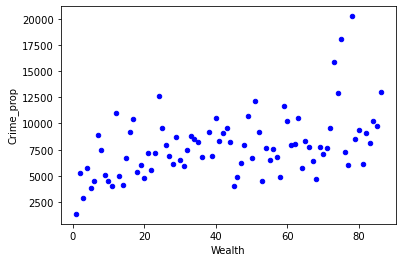

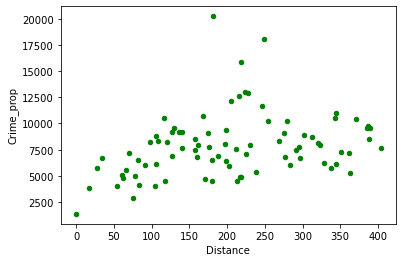

In [8]:
df.plot('Literacy', 'Crime_prop', kind='scatter', color='red')
df.plot('Wealth', 'Crime_prop', kind='scatter', color='blue')
df.plot('Distance', 'Crime_prop', kind='scatter', color='green')

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X = df[['Literacy', 'Wealth', 'Distance']] # 독립변수
y = df['Crime_prop'] # 종속변수
model.fit(X,y) # 학습시키기

LinearRegression()

In [12]:
# literacy = 80
# wealth = 1
# distance = 20

# regionA = [literacy, wealth, distance]
# crimeA = model.predict([regionA])
# crimeA

crimeA = model.predict([[80, 1, 20]])
crimeA

array([3880.68993851])

In [17]:
literacy = 120
wealth = 1
distance = 20

regionB = [literacy, wealth, distance]
crimeB = model.predict([regionB])
crimeB

array([2215.63457009])

In [ ]:
# 독립변수, 종속변수
# 후보변수
# 탈락시킬 변수 등 다양한 변수가 있음

# 변수를 선택하는 방법=========================================
# 전진선택법
# 후진제거법

In [13]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)
print(type(boston.data))
print(boston.data[:3])

(506, 13)
<class 'numpy.ndarray'>
[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]]


In [19]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

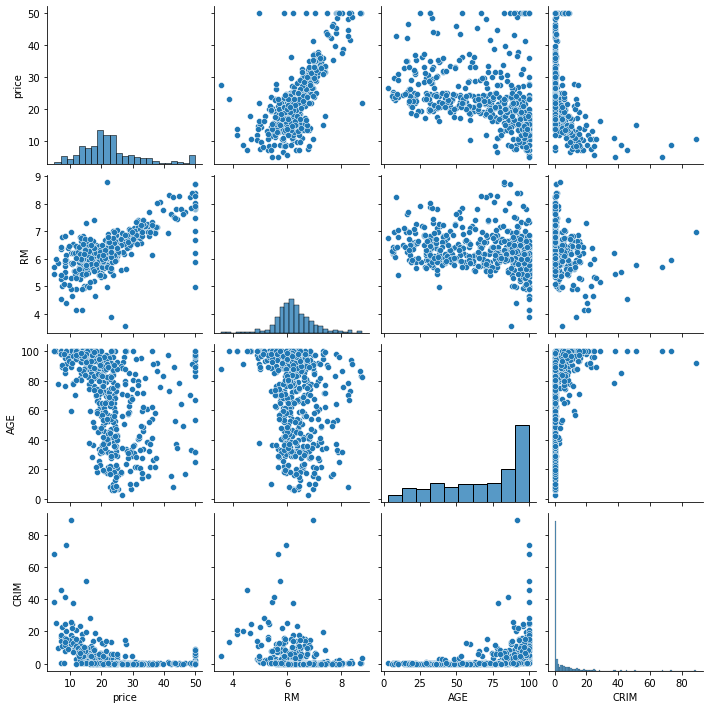

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df["price"] = boston.target

# 산점도 행렬 그래프 pairplot()
sns.pairplot(df[["price", "RM", "AGE", "CRIM"]])
plt.show()

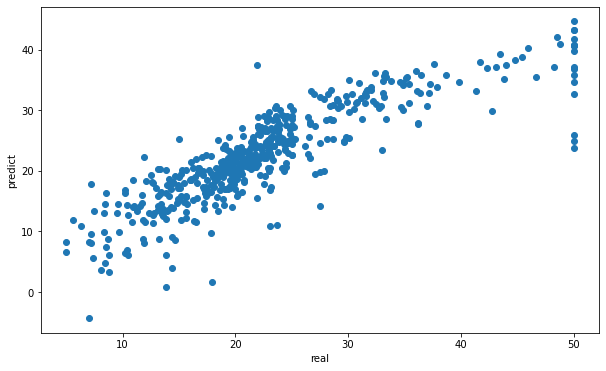

In [18]:
model = LinearRegression().fit(boston.data, boston.target)

# X값만 집어넣어서 y값을 예측할 수 있게 해주는 predict() 함수

predicted = model.predict(boston.data)
plt.figure(figsize=(10,6))
plt.scatter(boston.target, predicted)
plt.xlabel("real")
plt.ylabel("predict")
plt.show()

In [19]:
import mglearn

# 변수끼리 곱해서 파생변수를 만든 확장버전

X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


In [20]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [21]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=["MEDV"])

# 데이터프레임을 가로 방향으로 합침

df = pd.concat([X,y],axis=1)
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
model = LinearRegression().fit(X_train, y_train)

print("학습용: ", model.score(X_train, y_train))
print("검증용: ", model.score(X_test, y_test))

학습용:  0.7495400632086622
검증용:  0.6996255772983122


In [23]:
# 상관계수(=회귀계수, 기울기)
coef = model.coef_
print(coef)

[[-1.53776087e-01  6.50159270e-02 -2.42597326e-02  1.62203309e+00
  -1.52999306e+01  3.35196668e+00  1.13259963e-02 -1.54810871e+00
   3.02641886e-01 -1.22317535e-02 -8.11539044e-01  1.29504798e-02
  -5.44861583e-01]]


In [24]:
# 절편
intercept = model.intercept_
print(intercept)

[34.24483703]


In [25]:
pred = model.predict(boston.data)

In [26]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

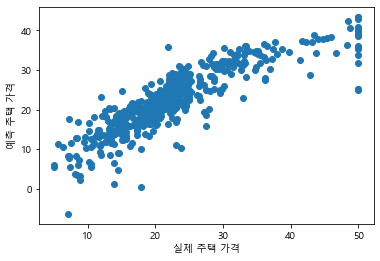

In [27]:
plt.scatter(boston.target, pred)
plt.xlabel("실제 주택 가격")
plt.ylabel("예측 주택 가격")
plt.show()

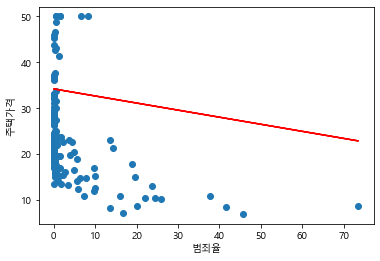

In [28]:
plt.scatter(X_test["CRIM"], y_test)
plt.plot(X_test["CRIM"], coef[0][0]*X_test["CRIM"] + intercept, c = "red")
plt.xlabel("범죄율")
plt.ylabel("주택가격")
plt.show()

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CRIM', ylabel='MEDV'>

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


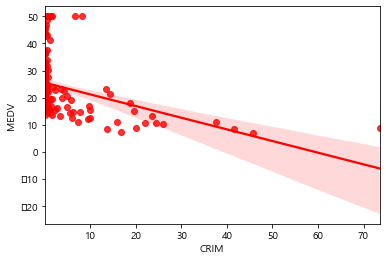

In [30]:
sns.regplot(X_test["CRIM"], y_test, color="red")

In [35]:
import statsmodels.api as sm

dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()

print("회귀계수:\n ",result_boston2.params)
print("R-squared:\n ",result_boston2.rsquared)
print("P values:\n ", result_boston2.pvalues)
print("요약결과:\n", result_boston2.summary())

회귀계수:
  CRIM      -0.092897
ZN         0.048715
INDUS     -0.004060
CHAS       2.853999
NOX       -2.868436
RM         5.928148
AGE       -0.007269
DIS       -0.968514
RAD        0.171151
TAX       -0.009396
PTRATIO   -0.392191
B          0.014906
LSTAT     -0.416304
dtype: float64
R-squared:
  0.9591890143535311
P values:
  CRIM       7.197130e-03
ZN         7.762640e-04
INDUS      9.497886e-01
CHAS       1.689461e-03
NOX        3.935067e-01
RM         1.179476e-61
AGE        5.989795e-01
DIS        1.016889e-06
RAD        1.064354e-02
TAX        1.698772e-02
PTRATIO    3.925055e-04
B          5.266943e-08
LSTAT      2.142519e-15
dtype: float64
요약결과:
                                  OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                       

In [36]:
dfX.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


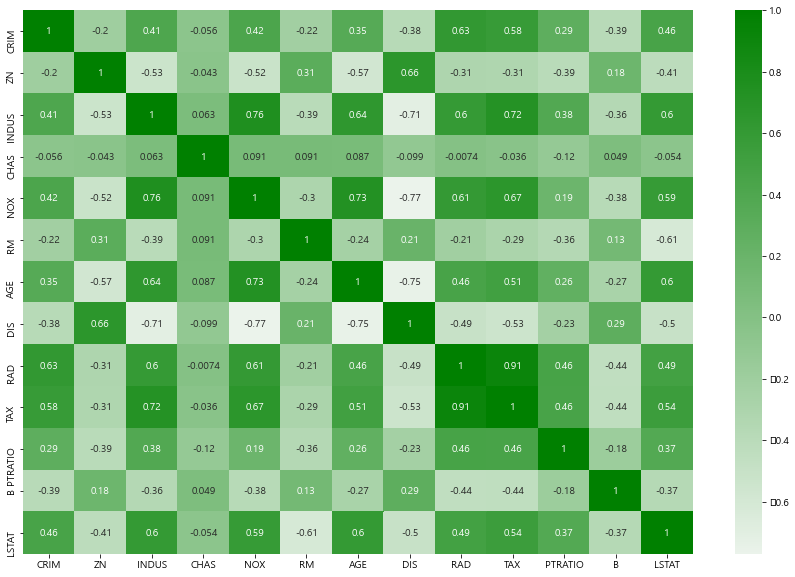

In [37]:
import seaborn as sns
plt.figure(figsize=(15,10))
cmap = sns.light_palette("green", as_cmap=True)
sns.heatmap(dfX.corr(), annot=True, cmap=cmap)
plt.show()

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(dfX.values, i) for i in range(dfX.shape[1])]
vif['변수'] = dfX.columns
vif = vif.sort_values("VIF").reset_index(drop=True)
vif

,VIF,변수
0,1.152952,CHAS
1,2.100373,CRIM
2,2.844013,ZN
3,11.102025,LSTAT
4,14.485758,INDUS
5,14.699652,DIS
6,15.167725,RAD
7,20.104943,B
8,21.386850,AGE
9,61.227274,TAX


In [44]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [45]:
arr = boston.data[:, [0,1,3,4,5,6,7,8,9,10,11,12]]
arr

array([[6.3200e-03, 1.8000e+01, 0.0000e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 0.0000e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 0.0000e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 0.0000e+00, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 0.0000e+00, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 0.0000e+00, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [46]:
dfX = pd.DataFrame(arr, columns=['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'])
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston3 = sm.OLS(dfy, dfX)
result_boston3 = model_boston3.fit()

print("회귀계수:\n ",result_boston3.params)
print("R-squared:\n ",result_boston3.rsquared)
print("P values:\n ", result_boston3.pvalues)
print("요약결과:\n", result_boston3.summary())

회귀계수:
  CRIM      -0.092808
ZN         0.048813
CHAS       2.848208
NOX       -2.927475
RM         5.931793
AGE       -0.007274
DIS       -0.965462
RAD        0.172304
TAX       -0.009504
PTRATIO   -0.393025
B          0.014914
LSTAT     -0.416504
dtype: float64
R-squared:
  0.9591886857507301
P values:
  CRIM       7.145593e-03
ZN         6.970046e-04
CHAS       1.615787e-03
NOX        3.640270e-01
RM         1.728076e-63
AGE        5.983475e-01
DIS        4.876021e-07
RAD        7.456777e-03
TAX        7.315910e-03
PTRATIO    3.411125e-04
B          4.819839e-08
LSTAT      1.735166e-15
dtype: float64
요약결과:
                                  OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              967.5
Date:                Fri, 03 De

In [49]:
arr = boston.data[:, [0,1,3,4,5,7,8,9,10,11,12]]

dfX = pd.DataFrame(arr, columns=['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'])
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston4 = sm.OLS(dfy, dfX)
result_boston4 = model_boston4.fit()

print("회귀계수:\n ",result_boston4.params)
print("R-squared:\n ",result_boston4.rsquared)
print("P values:\n ", result_boston4.pvalues)
print("요약결과:\n", result_boston4.summary())

회귀계수:
  CRIM      -0.092765
ZN         0.049751
CHAS       2.824757
NOX       -3.394518
RM         5.897915
DIS       -0.929765
RAD        0.174267
TAX       -0.009552
PTRATIO   -0.395069
B          0.014857
LSTAT     -0.425399
dtype: float64
R-squared:
  0.9591657310753959
P values:
  CRIM       7.129382e-03
ZN         4.930894e-04
CHAS       1.727705e-03
NOX        2.733719e-01
RM         3.183764e-65
DIS        2.125823e-07
RAD        6.677787e-03
TAX        6.963545e-03
PTRATIO    3.119472e-04
B          5.160147e-08
LSTAT      9.269373e-18
dtype: float64
요약결과:
                                  OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              1057.
Date:                Fri, 03 Dec 2021   Prob (F-statistic):                

In [50]:
arr = boston.data[:, [0,1,3,5,7,8,9,10,11,12]]

dfX = pd.DataFrame(arr, columns=['CRIM', 'ZN', 'CHAS', 'RM', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'])
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston5 = sm.OLS(dfy, dfX)
result_boston5 = model_boston5.fit()

print("회귀계수:\n ",result_boston5.params)
print("R-squared:\n ",result_boston5.rsquared)
print("P values:\n ", result_boston5.pvalues)
print("요약결과:\n", result_boston5.summary())

회귀계수:
  CRIM      -0.091081
ZN         0.051292
CHAS       2.718498
RM         5.714502
DIS       -0.866551
RAD        0.182790
TAX       -0.010896
PTRATIO   -0.400242
B          0.014532
LSTAT     -0.449224
dtype: float64
R-squared:
  0.9590665393503892
P values:
  CRIM       8.185236e-03
ZN         3.086919e-04
CHAS       2.415760e-03
RM         5.457365e-82
DIS        3.117713e-07
RAD        4.175079e-03
TAX        1.051013e-03
PTRATIO    2.577209e-04
B          8.276880e-08
LSTAT      1.047574e-23
dtype: float64
요약결과:
                                  OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              1162.
Date:                Fri, 03 Dec 2021   Prob (F-statistic):                        0.00
Time:                        15

In [51]:
print(result_boston5.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              1162.
Date:                Fri, 03 Dec 2021   Prob (F-statistic):                        0.00
Time:                        15:36:20   Log-Likelihood:                         -1524.5
No. Observations:                 506   AIC:                                      3069.
Df Residuals:                     496   BIC:                                      3111.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [52]:
from statsmodels.datasets.longley import load_pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dfy = load_pandas().endog
dfX = load_pandas().exog
df = pd.concat([dfy, dfX], axis=1)
df.head()

,TOTEMP,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,60323.0,83.0,234289.0,2356.0,1590.0,107608.0,1947.0
1,61122.0,88.5,259426.0,2325.0,1456.0,108632.0,1948.0
2,60171.0,88.2,258054.0,3682.0,1616.0,109773.0,1949.0
3,61187.0,89.5,284599.0,3351.0,1650.0,110929.0,1950.0
4,63221.0,96.2,328975.0,2099.0,3099.0,112075.0,1951.0


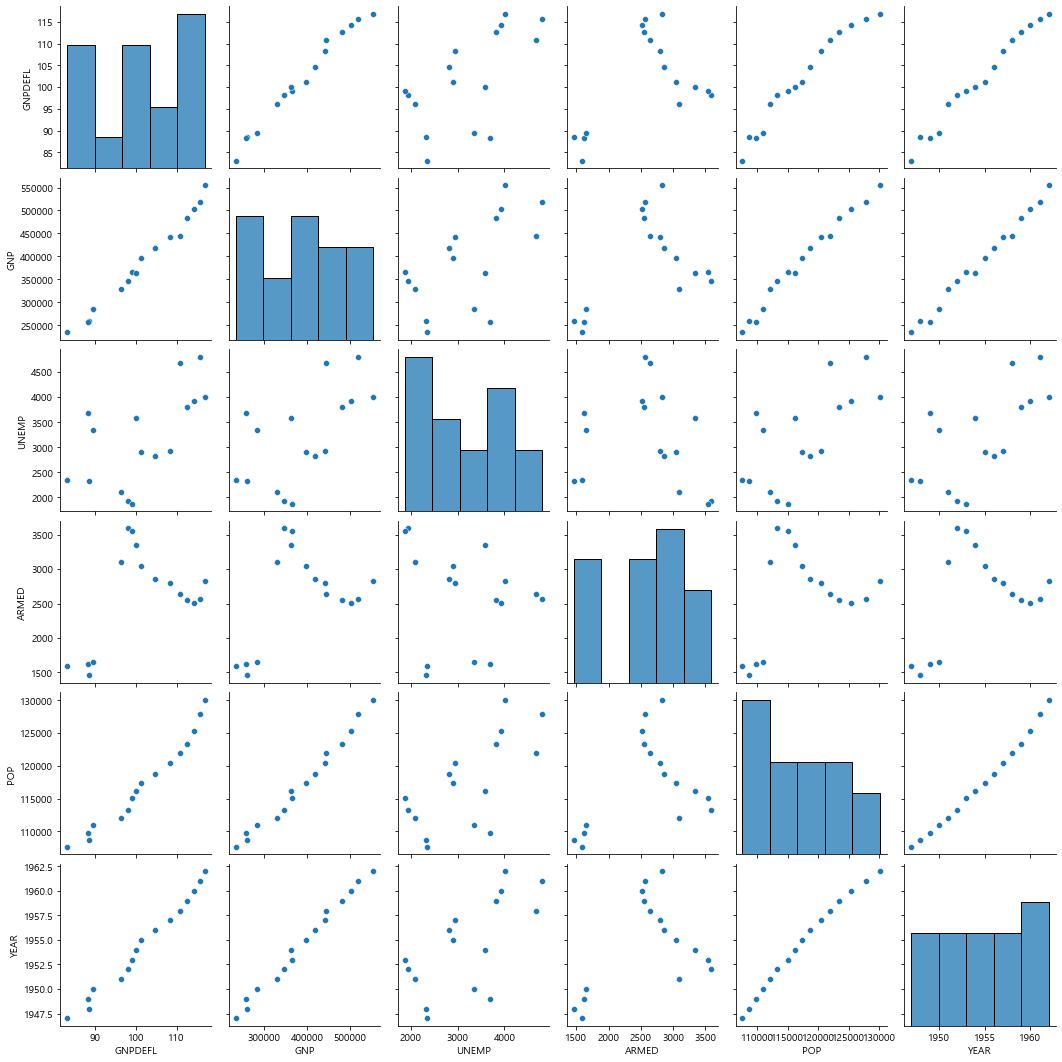

In [53]:
sns.pairplot(dfX)
plt.show()

In [54]:
# 상관관계행렬 보기

dfX.corr()

,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
GNPDEFL,1.000000,0.991589,0.620633,0.464744,0.979163,0.991149
GNP,0.991589,1.000000,0.604261,0.446437,0.991090,0.995273
UNEMP,0.620633,0.604261,1.000000,-0.177421,0.686552,0.668257
ARMED,0.464744,0.446437,-0.177421,1.000000,0.364416,0.417245
POP,0.979163,0.991090,0.686552,0.364416,1.000000,0.993953
YEAR,0.991149,0.995273,0.668257,0.417245,0.993953,1.000000


<AxesSubplot:>

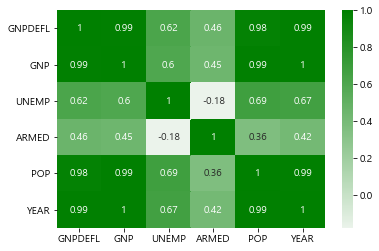

In [55]:
%matplotlib inline
cmap = sns.light_palette("green", as_cmap=True)
sns.heatmap(dfX.corr(), annot=True, cmap=cmap)

In [56]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

def get_model1(seed):
    df_train, df_test = train_test_split(df, test_size=0.5, random_state=seed)
    model = sm.OLS.from_formula("TOTEMP ~ GNPDEFL + POP + GNP + YEAR + ARMED + UNEMP", data=df_train)
    return df_train, df_test, model.fit()

df_train, df_test, result1 = get_model1(3)
result1.summary()

C:\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TOTEMP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     437.5
Date:                Fri, 03 Dec 2021   Prob (F-statistic):             0.0366
Time:                        15:50:26   Log-Likelihood:                -44.199
No. Observations:                   8   AIC:                             102.4
Df Residuals:                       1   BIC:                             103.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.235e+07   2.97e+06     -4.165      0.150      -5e+07    2.53e+07
GNPDEFL      106.2620     75.709      1.404      0.394    -855.708    1068.232
POP            2.2959      0.725      3.167      0.195      -6.915      11.506
GNP           -0.3997      0.120     -3.339      0.185      -1.920       1.121
YEAR        6300.6231   1498.900      4.203      0.149   -1.27e+04    2.53e+04
ARMED         -0.2450      0.402     -0.609      0.652      -5.354       4.864
UNEMP         -6.3311      1.324     -4.782      0.131     -23.153      10.491
==============================================================================
Omnibus:                        0.258   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.879   Jarque-Bera (JB):                0.304
Skew:                           0.300   Prob(JB):                        0.859
Kurtosis:                       2.258   Cond. No.                     2.01e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
def calc_r2(df_test, result):
    target = df.loc[df_test.index].TOTEMP
    predict_test = result.predict(df_test)
    RSS = ((predict_test - target)**2).sum()
    TSS = ((target - target.mean())**2).sum()
    return 1 - RSS / TSS

train1 = []
test1 = []
for i in range(10):
    df_train, df_test, result = get_model1(i)
    train1.append(calc_r2(df_train, result))
    test1.append(calc_r2(df_test, result))

print(train1) # 학습용
print(test1) # 검증용

[0.9987038742050295, 0.9980503554982977, 0.9984751044825552, 0.9996192348457819, 0.9991092103164816, 0.9970491339294602, 0.9990327438989923, 0.9995684924269972, 0.9990043448072191, 0.9998945799042561]
[0.9815050656844267, 0.973849754306501, 0.9879366370011322, 0.7588861967876803, 0.9807206089304095, 0.8937889315063796, 0.8798563810571698, 0.931466577896602, 0.8608525682213877, 0.9677198735128874]


In [58]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfX.values, i) for i in range(dfX.shape[1])]
vif['features'] = dfX.columns
vif # GNPDEFL, POP, YEAR가 너무 높게 나옴

,VIF Factor,features
0,12425.514335,GNPDEFL
1,10290.435437,GNP
2,136.224354,UNEMP
3,39.983386,ARMED
4,101193.161993,POP
5,84709.950443,YEAR


In [59]:
# 독립변수를 3개로 줄이고 스케일링도 해줌

def get_model2(seed):
    df_train, df_test = train_test_split(df, test_size=0.5, random_state=seed)
    model = sm.OLS.from_formula("TOTEMP ~ scale(GNP) + scale(ARMED) + scale(UNEMP)", data = df_train)
    return df_train, df_test, model.fit()

df_train, df_test, result2 = get_model2(3)
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     118.6
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           0.000231
Time:                        15:55:16   Log-Likelihood:                -57.695
No. Observations:                   8   AIC:                             123.4
Df Residuals:                       4   BIC:                             123.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     6.538e+04    163.988    398.686   

C:\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [60]:
test2 = []
for i in range(10):
    df_train, df_test, result = get_model2(i)
    test2.append(calc_r2(df_test, result))

test2

[0.9763608388904903,
 0.9841984331185691,
 0.9687069366140135,
 0.939730405320177,
 0.9773357061188462,
 0.9561262155732314,
 0.9803852496698645,
 0.9917361722470804,
 0.9837134067639469,
 0.9789512977093211]

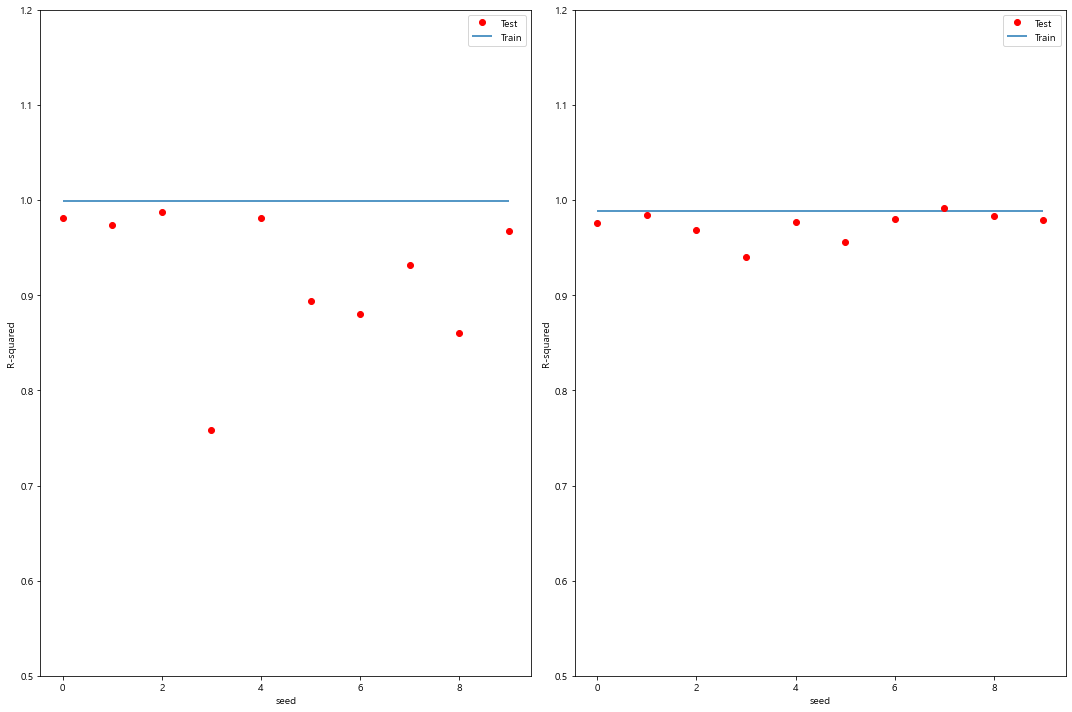

In [66]:
plt.figure(figsize=(15,10))
plt.subplot(121) # 1행 2열 중 1번
plt.plot(test1, 'ro', label="Test") # 'ro'는 빨간색으로 점 찍으라는 뜻
plt.hlines(result1.rsquared, 0, 9, label="Train") 
plt.legend()
plt.xlabel("seed")
plt.ylabel("R-squared")
plt.ylim(0.5, 1.2)

plt.subplot(122) # 1행 2열 중 2번
plt.plot(test2, 'ro', label="Test")
plt.hlines(result2.rsquared, 0, 9, label="Train")
plt.legend()
plt.xlabel("seed")
plt.ylabel("R-squared")
plt.ylim(0.5, 1.2)

plt.tight_layout()
plt.show()

In [ ]:
# 12/06

In [1]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)

In [2]:
import statsmodels.api as sm

# ("종속변수 ~ 독립변수+독립변수...")인데, boston.feature_names의 리스트 속 요소들을 일일히 쓰기 귀찮으니까 join 함수를 쓴 것
model = sm.OLS.from_formula("MEDV ~ " + "+".join(boston.feature_names), data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          6.72e-135
Time:                        09:37:11   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# R-squared 값을 보면 정확도 74.1%의 모델임을 알 수 있음
# Pvalue를 보면 INDUS와 AGE가 유의하지 않음
# 조건수Cond.No.가 너무 큼

In [3]:
# 표준편차std만 뽑아보기
dfX.describe().loc["std"]

CRIM         8.601545
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
Name: std, dtype: float64

<AxesSubplot:>

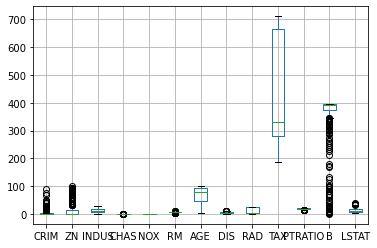

In [4]:
%matplotlib inline
dfX.boxplot()

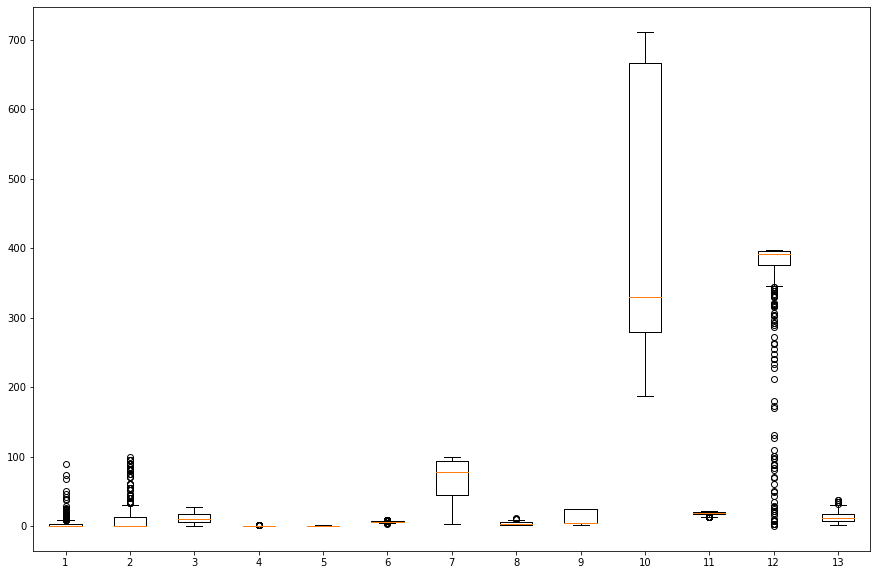

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,10))
plt.boxplot(dfX)
plt.show()

In [8]:
# 변수들의 평균값 계산
mean_on_train = dfX.mean(axis=0)

# 변수들의 표준편차값 계산
std_on_train = dfX.std(axis=0)

In [10]:
# 값에서 평균을 빼고 표준편차로 나누면 평균 0, 표준편차 1인 데이터로 변환
dfX_scaled = (dfX - mean_on_train) / std_on_train
print(dfX_scaled.head())

       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.419367  0.284548 -1.286636 -0.272329 -0.144075  0.413263 -0.119895   
1 -0.416927 -0.487240 -0.592794 -0.272329 -0.739530  0.194082  0.366803   
2 -0.416929 -0.487240 -0.592794 -0.272329 -0.739530  1.281446 -0.265549   
3 -0.416338 -0.487240 -1.305586 -0.272329 -0.834458  1.015298 -0.809088   
4 -0.412074 -0.487240 -1.305586 -0.272329 -0.834458  1.227362 -0.510674   

        DIS       RAD       TAX   PTRATIO         B     LSTAT  
0  0.140075 -0.981871 -0.665949 -1.457558  0.440616 -1.074499  
1  0.556609 -0.867024 -0.986353 -0.302794  0.440616 -0.491953  
2  0.556609 -0.867024 -0.986353 -0.302794  0.396035 -1.207532  
3  1.076671 -0.752178 -1.105022  0.112920  0.415751 -1.360171  
4  1.076671 -0.752178 -1.105022  0.112920  0.440616 -1.025487  


In [11]:
print(dfX_scaled.describe())

               CRIM            ZN         INDUS          CHAS           NOX  \
count  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02   
mean   8.326673e-17  3.466704e-16 -3.016965e-15  3.999875e-16  3.563575e-15   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -4.193669e-01 -4.872402e-01 -1.556302e+00 -2.723291e-01 -1.464433e+00   
25%   -4.105633e-01 -4.872402e-01 -8.668328e-01 -2.723291e-01 -9.121262e-01   
50%   -3.902803e-01 -4.872402e-01 -2.108898e-01 -2.723291e-01 -1.440749e-01   
75%    7.389247e-03  4.872402e-02  1.014995e+00 -2.723291e-01  5.980871e-01   
max    9.924110e+00  3.800473e+00  2.420170e+00  3.664771e+00  2.729645e+00   

                 RM           AGE           DIS           RAD           TAX  \
count  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02   
mean  -1.149882e-14 -1.158274e-15  7.308603e-16 -1.068535e-15  6.534079e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.

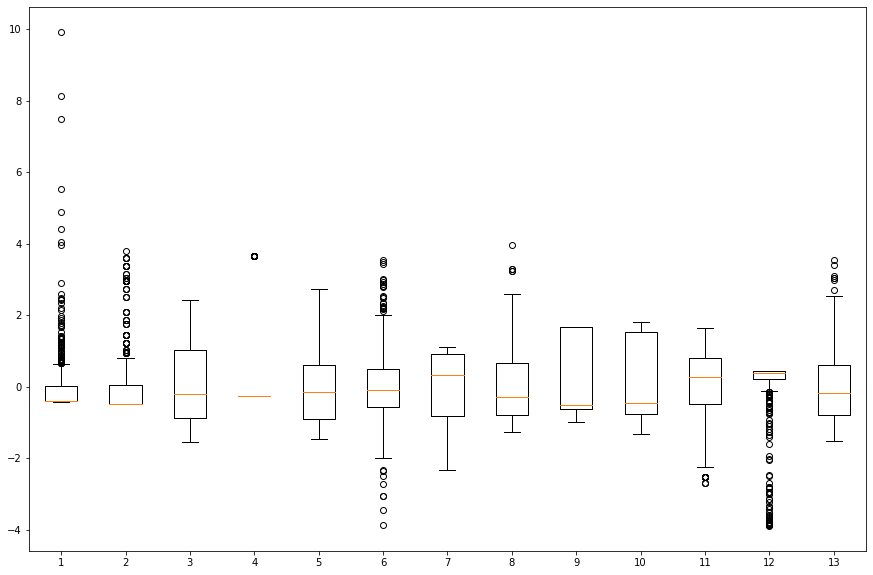

In [14]:
%matplotlib inline
plt.figure(figsize=(15,10))
plt.boxplot(dfX_scaled)
plt.show()

In [12]:
df_scaled = pd.concat([dfX_scaled, dfy], axis=1)

In [13]:
model = sm.OLS.from_formula("MEDV ~ " + "+".join(boston.feature_names), data=df_scaled)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          6.72e-135
Time:                        09:50:05   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.5328      0.211    106.814      0.000      22.118      22.947
CRIM          -0.9291      0.283     -3.287      0.001      -1.484      -0.374
ZN             1.0826      0.320      3.382      0.001       0.454       1.712
INDUS          0.1410      0.422      0.334      0.738      -0.688       0.970
CHAS           0.6824      0.219      3.118      0.002       0.252       1.112
NOX           -2.0588      0.443     -4.651      0.000      -2.928      -1.189
RM             2.6769      0.294      9.116      0.000       2.100       3.254
AGE            0.0195      0.372      0.052      0.958      -0.711       0.750
DIS           -3.1071      0.420     -7.398      0.000      -3.932      -2.282
RAD            2.6649      0.578      4.613      0.000       1.530       3.800
TAX           -2.0788      0.634     -3.280      0.001      -3.324      -0.834
PTRATIO       -2.0626      0.283     -7.283      0.000      -2.619      -1.506
B              0.8501      0.245      3.467      0.001       0.368       1.332
LSTAT         -3.7473      0.362    -10.347      0.000      -4.459      -3.036
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                         9.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

boston = load_boston()
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)

N = len(df) # 샘플수. 506건 나옴
ratio = 0.7
np.random.seed(0) # 랜덤시드 고정

# 샘플수 전체에서, 70퍼센트에 해당되는 개수를 랜덤하게 선택, replace=False 하면 중복값 안 나옴. 중복값 나오는 추출은 "복원추출"
idx_train = np.random.choice(np.arange(N), np.int(ratio*N), replace=False)
# difference()는 차집합으로, 전체에서 70%의 검증용샘플을 제외한 30% 추출
idx_test = list(set(np.arange(N)).difference(idx_train))

print(N, len(idx_train), len(idx_test))

df_train = df.iloc[idx_train]
df_test = df.iloc[idx_test]

506 354 152


<ipython-input-1-ff1bc45d2b52>:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  idx_train = np.random.choice(np.arange(N), np.int(ratio*N), replace=False)


In [30]:
import statsmodels.api as sm

model = sm.OLS.from_formula("MEDV ~ " + "+".join(boston.feature_names), data=df_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     70.06
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           8.57e-88
Time:                        10:46:30   Log-Likelihood:                -1043.0
No. Observations:                 354   AIC:                             2114.
Df Residuals:                     340   BIC:                             2168.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.0719      5.932      5.913      0.0

In [31]:
pred = result.predict(df_test)
rss = ((df_test.MEDV - pred) **2).sum() # 잔차(실제값-예측값)의 분산, 오차의 크기 계산
tss = ((df_test.MEDV - df_test.MEDV.mean())**2).sum() # 종속변수의 분산 계산

rsquared = 1 - rss / tss # 68.8%의 정확도가 나옴
rsquared

0.7519796502601109

In [32]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)
df_train.shape, df_test.shape

((354, 14), (152, 14))

In [33]:
dfX_train, dfX_test, dfy_train, dfy_test = train_test_split(dfX, dfy, test_size=0.3, random_state=0)
dfX_train.shape, dfX_test.shape, dfy_train.shape, dfy_test.shape

((354, 13), (152, 13), (354, 1), (152, 1))

In [34]:
from sklearn.model_selection import KFold

# np.zeros(5) = 0이 5개 든 1차원 배열 만듦
scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df)): # enumerate() 함수는 인덱스와 값 출력
    df_train = df.iloc[idx_train]
    df_test = df.iloc[idx_test]

    model = sm.OLS.from_formula("MEDV ~ " + "+".join(boston.feature_names), data = df_train)
    result = model.fit()

    pred = result.predict(df_test)
    rss = ((df_test.MEDV - pred)**2).sum()
    tss = ((df_test.MEDV - df_test.MEDV.mean())**2).sum()
    rsquared = 1 - rss / tss

    scores[i] = rsquared

    print(f"학습용 R2 = {result.rsquared:.3f}, 검증용 R2 = {rsquared:.3f}")

학습용 R2 = 0.773, 검증용 R2 = 0.589
학습용 R2 = 0.729, 검증용 R2 = 0.778
학습용 R2 = 0.749, 검증용 R2 = 0.668
학습용 R2 = 0.757, 검증용 R2 = 0.668
학습용 R2 = 0.705, 검증용 R2 = 0.840


In [39]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

scores1 = np.zeros(5)
scores2 = np.zeros(5)
scores3 = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df)):
    df_train = df.iloc[idx_train]
    df_test = df.iloc[idx_test]

    model = sm.OLS.from_formula("MEDV ~ " + "+".join(boston.feature_names), data = df_train)
    result = model.fit()

    pred = result.predict(df_test)
    rsquared = r2_score(df_test.MEDV, pred) # Rsquared 값 직접 출력
    scores1[i] = rsquared
    mse = mean_squared_error(df_test.MEDV, pred) # 평균제곱오차 : 오차의 제곱의 합계의 평균값
    scores2[i] = mse
    mae = mean_absolute_error(df_test.MEDV, pred) # 평균절대오차 : 오차의 합계의 평균값
    scores3[i] = mae

    print(scores1)
    print(scores2)
    print(scores3)

[0.58922238 0.         0.         0.         0.        ]
[33.44898  0.       0.       0.       0.     ]
[3.84290922 0.         0.         0.         0.        ]
[0.58922238 0.77799144 0.         0.         0.        ]
[33.44898    18.65881615  0.          0.          0.        ]
[3.84290922 3.38979394 0.         0.         0.        ]
[0.58922238 0.77799144 0.66791979 0.         0.        ]
[33.44898    18.65881615 21.23463289  0.          0.        ]
[3.84290922 3.38979394 3.07473854 0.         0.        ]
[0.58922238 0.77799144 0.66791979 0.6680163  0.        ]
[33.44898    18.65881615 21.23463289 29.22251557  0.        ]
[3.84290922 3.38979394 3.07473854 3.6463452  0.        ]
[0.58922238 0.77799144 0.66791979 0.6680163  0.83953317]
[33.44898    18.65881615 21.23463289 29.22251557 16.57369039]
[3.84290922 3.38979394 3.07473854 3.6463452  3.03058651]
